In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
data=pd.read_csv("D:/Portfolio Projects/WhatsApp Chat Analysis/data/whatsapp_chat_analysis/WhatsApp.csv")

In [95]:
data.sample(9)

,user,message,year,month,day,hour,minute
3766,+91 85378 65772,Bhai sims er interview er mail elo?\n,2021,June,3,5,9
10484,Debsrijan,Before 6p.m. today\n,2021,August,31,16,31
2882,Ojha,<Media omitted>\n,2021,April,16,12,53
3566,+91 90642 36011,<Media omitted>\n,2021,May,27,16,31
2289,+91 79809 05254,Kisi ka bhi na aya?\n,2021,April,12,20,10
6719,+91 79809 05254,<Media omitted>\n,2021,July,14,17,58
3173,+91 86375 45399,👍\n,2021,May,11,11,0
10137,+91 83920 96242,<Media omitted>\n,2021,August,10,23,13
3341,+91 89460 87152,Sir ke call kore bole dilam\n,2021,May,19,20,38


In [96]:
data=data.dropna(subset=['message'])

In [97]:
data['message']=data['message'].str.replace(r'\n', ' ', regex=True)
data['message']=data['message'].str.strip()

In [98]:
# Mapping month names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

data['month'] = data['month'].map(month_mapping)

In [99]:
data['datetime']=pd.to_datetime(data[['year','month','day','hour','minute']])

In [100]:
data=data.drop_duplicates()

In [101]:
data=data[data['user']!='group_notification']

In [102]:
data['user']=data['user'].astype('category')

In [103]:
data = data.rename(columns={"user":"names"})

In [104]:
data.head()

,names,message,year,month,day,hour,minute,datetime
3,+91 95648 92981,Keo clg jabi?,2021,3,26,21,41,2021-03-26 21:41:00
4,+91 6296 534 775,Kobe bol??,2021,3,26,21,46,2021-03-26 21:46:00
5,+91 95648 92981,Recently,2021,3,26,21,46,2021-03-26 21:46:00
6,+91 95648 92981,Tui bol Kobe jete chas,2021,3,26,21,47,2021-03-26 21:47:00
7,+91 6296 534 775,Exam sesh er por jabo,2021,3,26,21,47,2021-03-26 21:47:00


In [105]:
data.to_csv('Cleaned_data.csv', index=False)

In [106]:
total_messages=data.shape[0]

In [107]:
unique_users=data['names'].unique()

In [108]:
# Categories of message 
message_types=data['names'].value_counts().to_frame().reset_index()
message_types.columns=['names','count']

In [109]:
# Messages per day
data['date']=pd.to_datetime(data[['year','month','day']])
messages_per_day=data.groupby('date').size().mean()

In [110]:
# Display statistics
print(f"Total messages: {total_messages}")
print(f"Unique users: {unique_users}")
print(f"Messages per day (average): {messages_per_day:.2f}")
print("Top message contributors:")
print(message_types.head(10))

Total messages: 11827
Unique users: ['+91 95648 92981', '+91 6296 534 775', '+91 70744 01961', 'Debsrijan', '+91 93313 11239', ..., '+91 89106 32532', '+91 99324 04743', '+91 97751 94415', '+91 6294 390 992', '+91 95474 72559']
Length: 72
Categories (72, object): ['+91 6290 954 522', '+91 6294 135 234', '+91 6294 390 992', '+91 6296 534 775', ..., 'Riju', 'Sailesh', 'Sourav Kase', 'Vivek Ekka']
Messages per day (average): 46.38
Top message contributors:
              names  count
0         Debsrijan    755
1   +91 93313 11239    631
2       Sourav Kase    601
3           Sailesh    564
4  +91 6296 534 775    512
5   +91 91230 94581    508
6   +91 79801 55092    491
7   +91 90642 36011    483
8   +91 70037 70527    451
9              Ojha    431


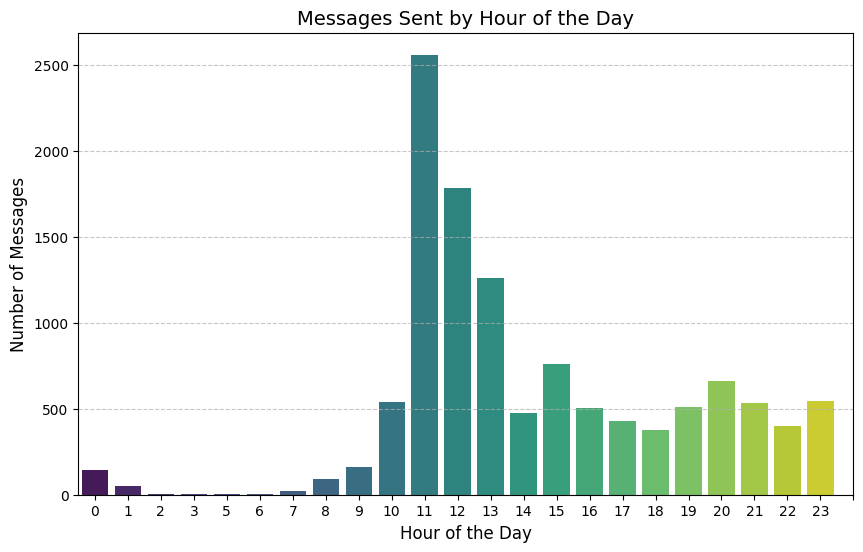

In [111]:
hourly_trends=data.groupby('hour').size()

#Plot hourly trends
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_trends.index,y=hourly_trends.values,palette='viridis')
plt.title("Messages Sent by Hour of the Day", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

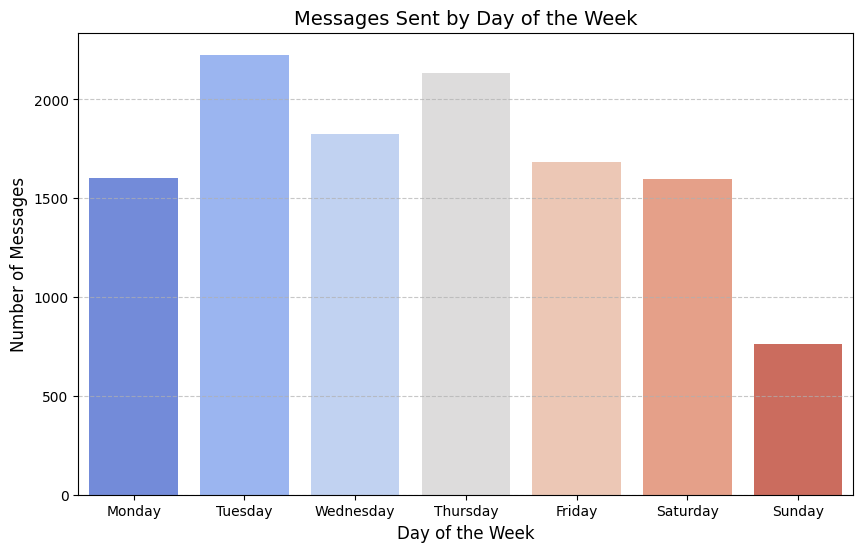

In [112]:
data['day_of_week']=pd.Categorical(data['date'].dt.day_name(),
                                   categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                  ordered=True)
daily_trends=data.groupby('day_of_week').size()

#plot daily trends
plt.figure(figsize=(10,6))
sns.barplot(x=daily_trends.index,y=daily_trends.values,palette='coolwarm')
plt.title("Messages Sent by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

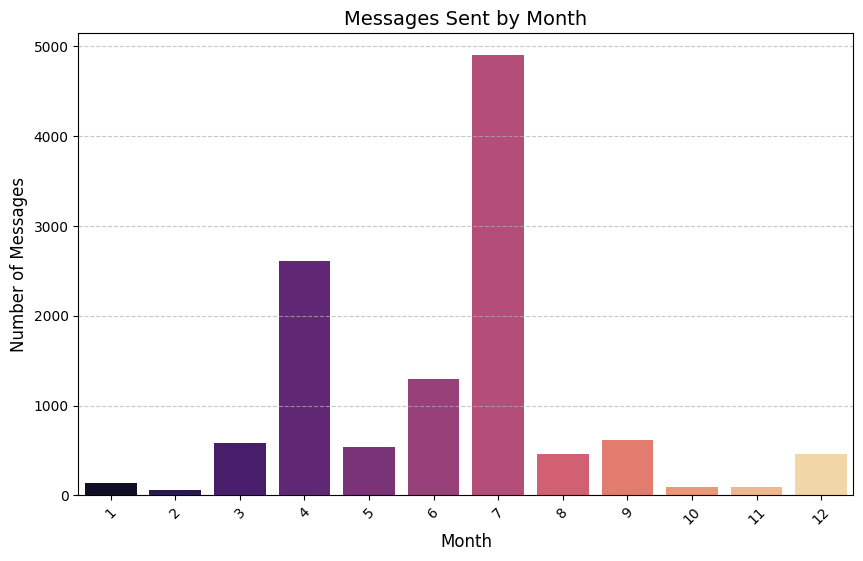

In [113]:
monthly_trends=data['month'].value_counts().sort_index()

#Plot Monthly trends
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_trends.index,y=monthly_trends.values,palette='magma')
plt.title("Messages Sent by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

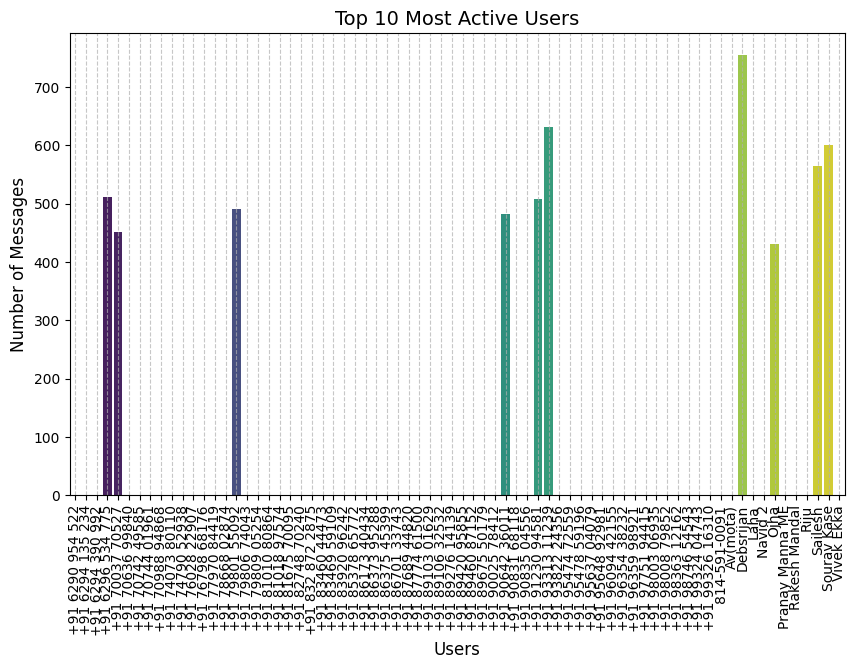

In [114]:
# Get the top 10 most active users
top_10_users = data['names'].value_counts().head(10)

# Plot the top 10 most active users
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_users.index, y=top_10_users.values, palette='viridis')
plt.title("Top 10 Most Active Users", fontsize=14)
plt.xlabel("Users", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

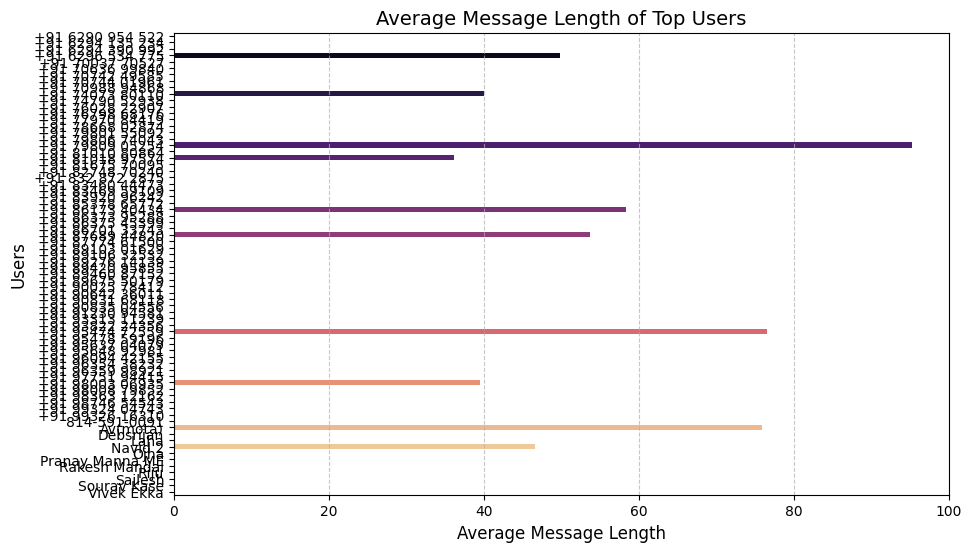

In [115]:
# Add a column for message length
data['message_length']=data['message'].str.len()

#Average Message Length per User
avg_message_length=data.groupby('names')['message_length'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_message_length.values, y=avg_message_length.index, palette='magma')
plt.title("Average Message Length of Top Users", fontsize=14)
plt.xlabel("Average Message Length", fontsize=12)
plt.ylabel("Users", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

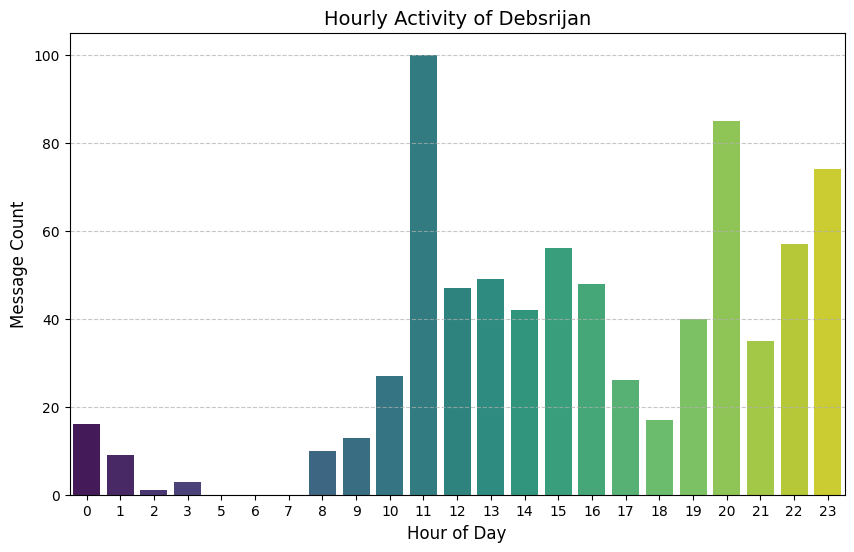

In [116]:
# Get the top 10 most active users
top_10_users = data['names'].value_counts().head(10)  # Ensure it's the right variable

# Select the most active user
top_user = top_10_users.index[0]  # Access the name of the most active user

# Group data by user and hour
user_hour_activity = data.groupby(["names", "hour"]).size().reset_index(name='count')

# Filter activity for the top user
top_user_activity = user_hour_activity[user_hour_activity['names'] == top_user]

# Plot the top user's hourly activity
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='count', data=top_user_activity, palette='viridis')
plt.title(f"Hourly Activity of {top_user}", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Message Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [117]:
!pip install emoji


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


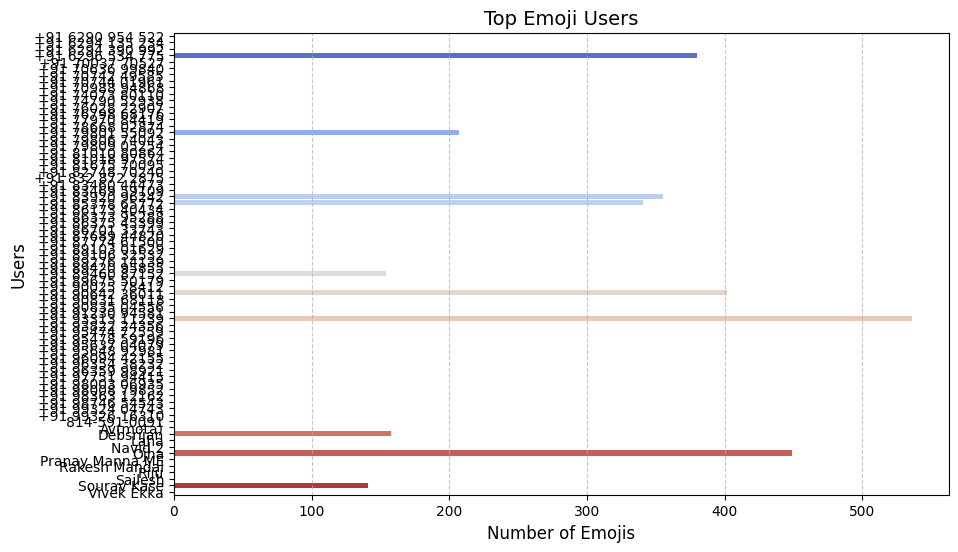

In [118]:
import emoji
def extract_emoji(text):
    return ' '.join([char for char in text if char in emoji.EMOJI_DATA])
#Add emoji column
data['emoji']=data['message'].apply(lambda x:extract_emoji(x) if isinstance(x,str) else ' ')

# Count emojis per user 
emoji_counts=data.groupby('names')['emoji'].apply(lambda x: ''.join(x)).str.len().sort_values(ascending=False).head(10)

# Plot emoji usage
plt.figure(figsize=(10, 6))
sns.barplot(x=emoji_counts.values, y=emoji_counts.index, palette='coolwarm')
plt.title("Top Emoji Users", fontsize=14)
plt.xlabel("Number of Emojis", fontsize=12)
plt.ylabel("Users", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

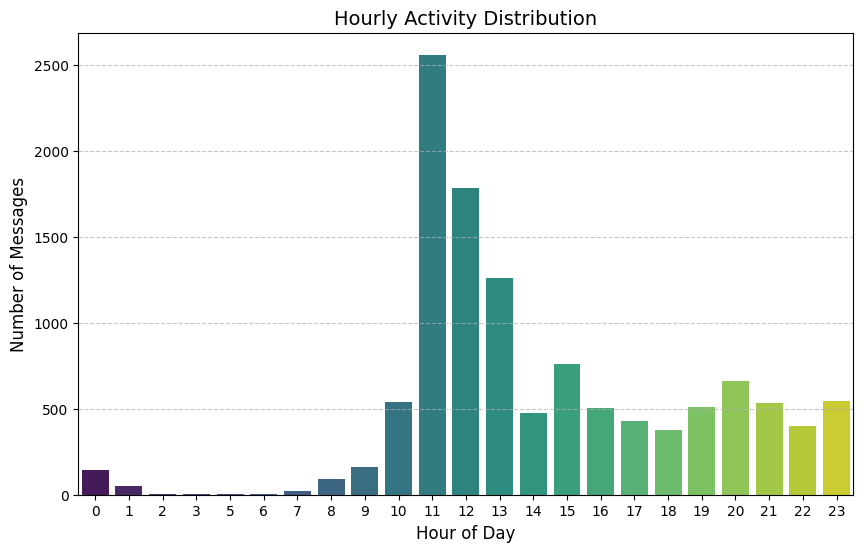

In [119]:
hourly_activity=data.groupby('hour').size()
# Plot hourly activity
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_activity.index, y=hourly_activity.values, palette='viridis')
plt.title("Hourly Activity Distribution", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

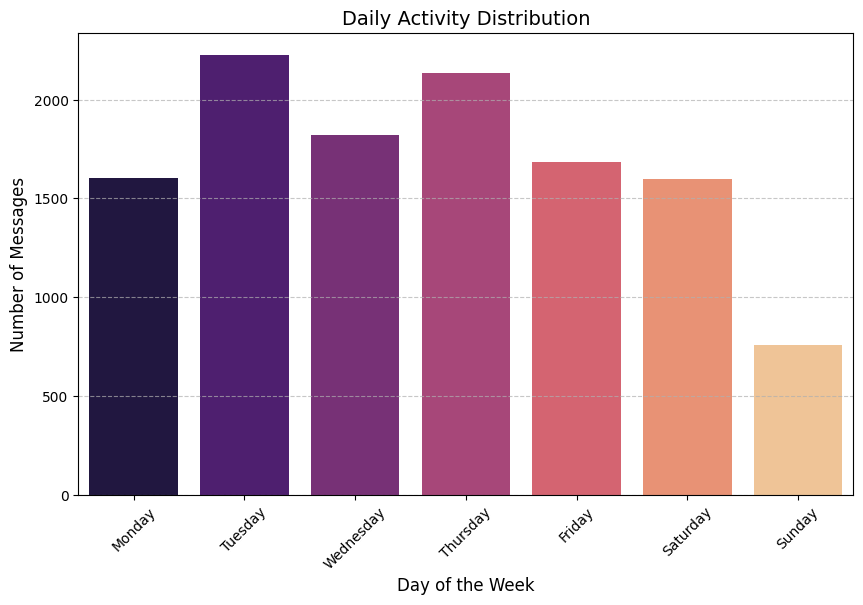

In [120]:
# Group data by day of the week
daily_activity = data['day_of_week'].value_counts()

# Plot daily activity
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_activity.index, y=daily_activity.values, palette='magma')
plt.title("Daily Activity Distribution", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

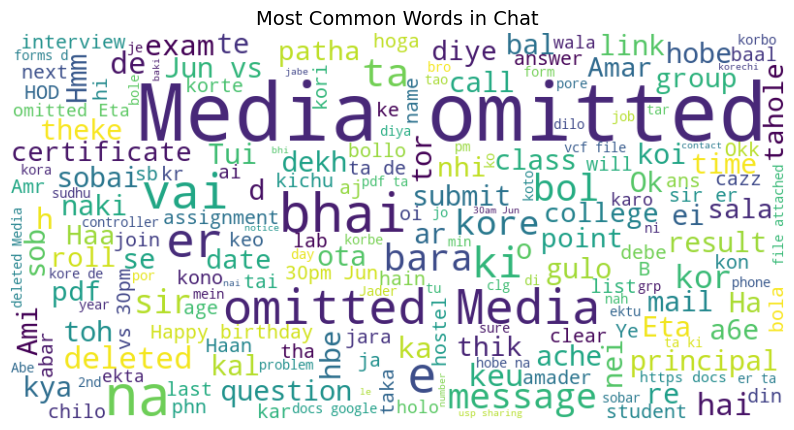

In [121]:
from wordcloud import WordCloud
from collections import Counter

# Combine all messages into one
all_messages=" ".join(data['message'].dropna())

#Create WordCloud
wordcloud=WordCloud(width=800,height=400,background_color='white',colormap='viridis').generate(all_messages)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Chat", fontsize=14)
plt.show()

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core

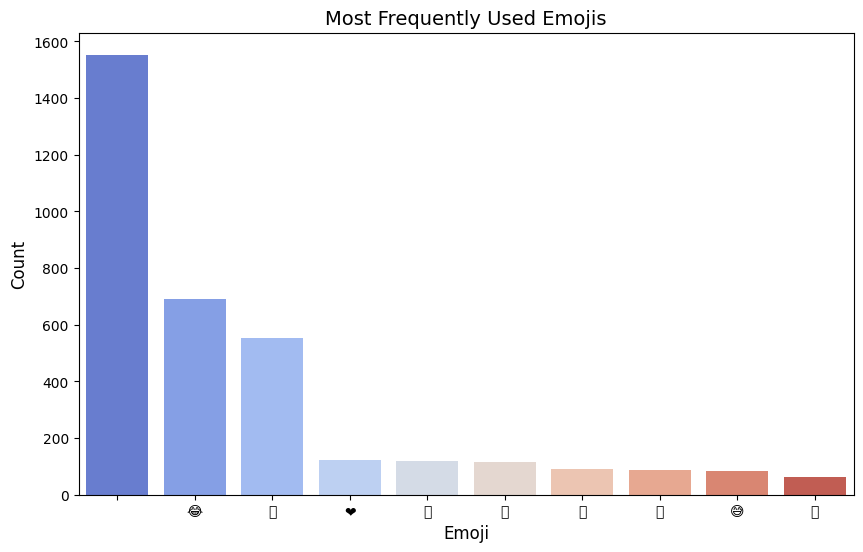

In [122]:
# # Emoji extraction
# def extract_emojis(text):
#     return " ".join(c for c in text if c in emoji.UNICODE_EMOJI['en'])
# df1['emojis'] = data['message'].apply(lambda x: extract_emojis(x) if isinstance(x, str) else '')

# Count emojis
all_emojis = ''.join(data['emoji'])
emoji_count = Counter(all_emojis)

# Convert to DataFrame for visualization
emoji_df = pd.DataFrame(emoji_count.items(), columns=['emoji', 'count']).sort_values(by='count', ascending=False).head(10)

# Plot most used emojis
plt.figure(figsize=(10, 6))
sns.barplot(x='emoji', y='count', data=emoji_df, palette='coolwarm')
plt.title("Most Frequently Used Emojis", fontsize=14)
plt.xlabel("Emoji", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

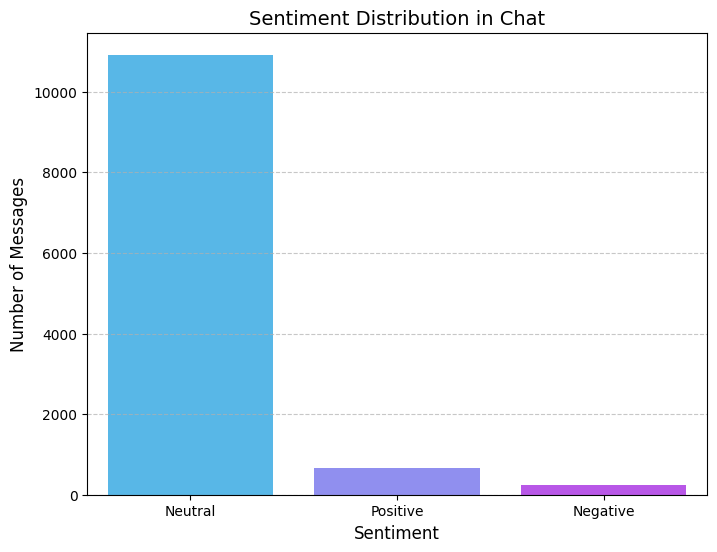

In [123]:
from textblob import TextBlob

# Calculate sentiment polarity
data['polarity'] = data['message'].apply(lambda x: TextBlob(x).sentiment.polarity if isinstance(x, str) else 0)

# Categorize sentiment
data['sentiment'] = data['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Plot sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='cool')
plt.title("Sentiment Distribution in Chat", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Messages", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
